In [117]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis (EDA) & Data Visualization

In [94]:
tips=sns.load_dataset('tips')
print(tips.head())
print(tips.info())
print(tips.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


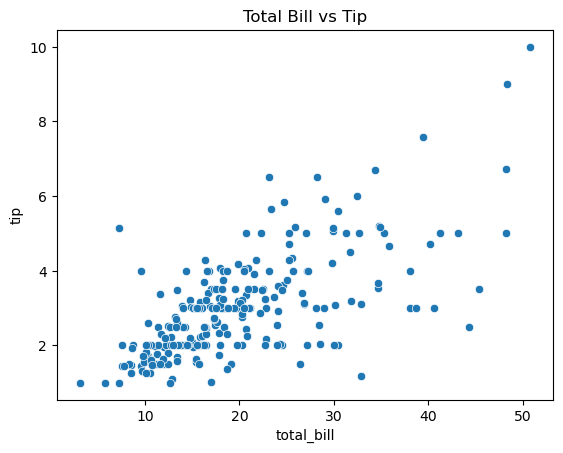

In [95]:
# Visualization
sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.title("Total Bill vs Tip")
plt.show()

In [99]:
tips_encoded = pd.get_dummies(tips, drop_first=True)

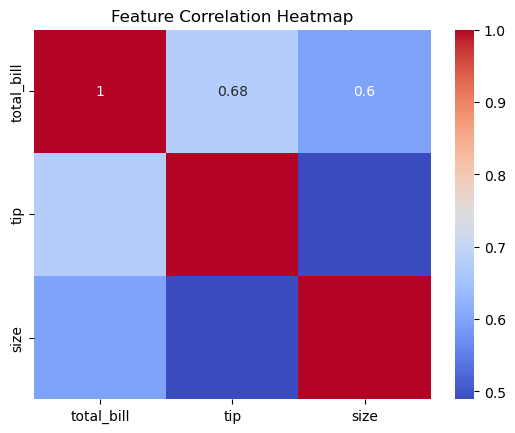

In [100]:
numeric_df = tips.select_dtypes(include=['number']) #calculating correlation matrix
#plotting heatmap
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Boxplot

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


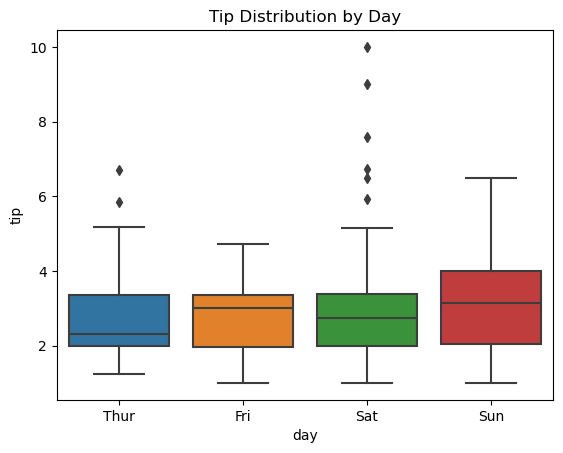

In [101]:
sns.boxplot(x='day',y='tip',data=tips)
plt.title("Tip Distribution by Day")
plt.show()

Histogram

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


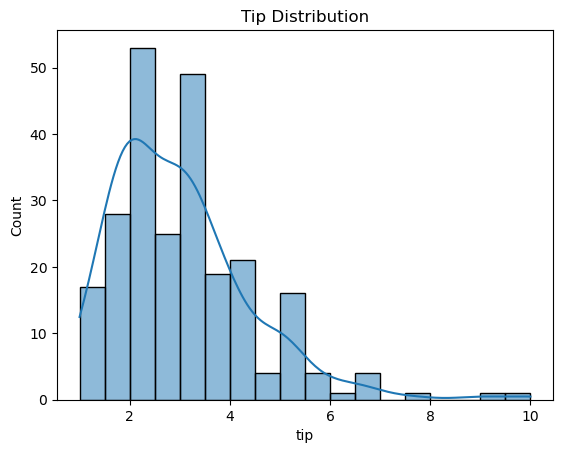

In [103]:
sns.histplot(tips['tip'],kde=True)
plt.title("Tip Distribution")
plt.show()

In [104]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Data Prepration

In [108]:
print(tips.isnull().sum()) #checking missing values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [110]:
# Convert categorical variables using One-Hot Encoding
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [111]:
# Feature Engineering
tips_encoded=pd.get_dummies(tips, columns=['sex','smoker','day','time'], drop_first=True)
print(tips_encoded.head())

   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2        True       True    False    False     True   
1       10.34  1.66     3       False       True    False    False     True   
2       21.01  3.50     3       False       True    False    False     True   
3       23.68  3.31     2       False       True    False    False     True   
4       24.59  3.61     4        True       True    False    False     True   

   time_Dinner  
0         True  
1         True  
2         True  
3         True  
4         True  


In [112]:
# splitting data
X=tips.drop(columns=['tip'])
y=tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Base model building

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

base_results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    base_results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    
    print(f"{name} Performance (Before Tuning):")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R² Score:", r2)
    print(f"Predicted Tips for {name} (First 10 values): {y_pred[:10]}")
    print("--------------------------------------------------")



Linear Regression Performance (Before Tuning):
MSE: 0.7033566017436109
RMSE: 0.8386635807900632
MAE: 0.6671331480264896
R² Score: 0.4373018194348246
Predicted Tips for Linear Regression (First 10 values): [2.91436632 2.00292613 3.96425583 3.76380832 2.14836306 2.67423448
 3.63934628 2.29147245 2.57207155 2.45851225]
--------------------------------------------------
Ridge Regression Performance (Before Tuning):
MSE: 0.7006514167823195
RMSE: 0.837049231994343
MAE: 0.66685917327475
R² Score: 0.43946601701545074
Predicted Tips for Ridge Regression (First 10 values): [2.91160821 2.00912165 3.96241273 3.77131078 2.16142274 2.6832509
 3.6392096  2.29464201 2.57332684 2.45145867]
--------------------------------------------------
Lasso Regression Performance (Before Tuning):
MSE: 1.4486680232392768
RMSE: 1.2036062575607012
MAE: 1.047104133961277
R² Score: -0.15896098636013822
Predicted Tips for Lasso Regression (First 10 values): [3.08779487 3.08779487 3.08779487 3.08779487 3.08779487 3.08779

# Hyperparameter Tuning

In [118]:
param_grid_ridge = {'model__alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
]), param_grid_ridge, cv=5, scoring='r2')

grid_search_ridge.fit(X_train, y_train)
print("Best Parameters for Ridge Regression:", grid_search_ridge.best_params_)

param_grid_lasso = {'model__alpha': [0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso())
]), param_grid_lasso, cv=5, scoring='r2')

grid_search_lasso.fit(X_train, y_train)
print("Best Parameters for Lasso Regression:", grid_search_lasso.best_params_)

param_grid_tree = {
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}
grid_search_tree = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
]), param_grid_tree, cv=5, scoring='r2')

grid_search_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

Best Parameters for Ridge Regression: {'model__alpha': 100}
Best Parameters for Lasso Regression: {'model__alpha': 0.1}
Best Parameters for Decision Tree: {'model__max_depth': 3, 'model__min_samples_split': 2}


# Testing & Final Model

In [119]:
final_models = {
    "Ridge Regression": grid_search_ridge.best_estimator_,
    "Lasso Regression": grid_search_lasso.best_estimator_,
    "Decision Tree": grid_search_tree.best_estimator_
}

final_results = {}

for name, model in final_models.items():
    y_pred_final = model.predict(X_test)  # Predicting tips using the best-tuned model
    
    mse = mean_squared_error(y_test, y_pred_final)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_final)
    r2 = r2_score(y_test, y_pred_final)
    
    final_results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    
    print(f"{name} Performance (After Tuning):")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R² Score:", r2)
    print(f"Predicted Tips for {name} (First 10 values): {y_pred_final[:10]}")
    print("--------------------------------------------------")



Ridge Regression Performance (After Tuning):
MSE: 0.6890630883584778
RMSE: 0.8300982401851469
MAE: 0.697399874792066
R² Score: 0.44873689227804525
Predicted Tips for Ridge Regression (First 10 values): [2.90772503 2.31760759 3.8106789  3.79236944 2.43127487 2.82326273
 3.37404347 2.43444106 2.67319087 2.60723249]
--------------------------------------------------
Lasso Regression Performance (After Tuning):
MSE: 0.6122095126615545
RMSE: 0.7824381845625599
MAE: 0.6548094795721159
R² Score: 0.5102211622875712
Predicted Tips for Lasso Regression (First 10 values): [2.94143845 2.01785852 3.73066878 3.84266852 2.37140993 2.78012539
 3.66191437 2.32794735 2.5201857  2.57033484]
--------------------------------------------------
Decision Tree Performance (After Tuning):
MSE: 0.7804343720990294
RMSE: 0.8834219671816121
MAE: 0.6967205681500598
R² Score: 0.37563818958689676
Predicted Tips for Decision Tree (First 10 values): [2.85875    1.96317073 4.40633333 4.40633333 1.96317073 3.50545455
 3.5

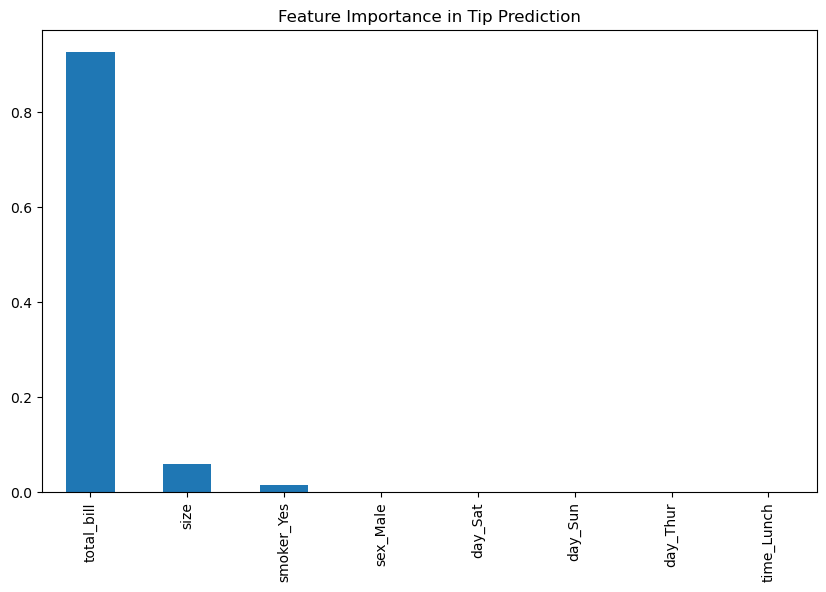

Most important features influencing tip amount:
total_bill    0.926817
size          0.058384
smoker_Yes    0.014800
sex_Male      0.000000
day_Sat       0.000000
dtype: float64


In [120]:
# Feature Importance (for Decision Tree)
feature_importance = pd.Series(final_models["Decision Tree"].named_steps['model'].feature_importances_, 
                               index=numerical_features + list(final_models["Decision Tree"].named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Tip Prediction")
plt.show()

print("Most important features influencing tip amount:")
print(feature_importance.head(5))

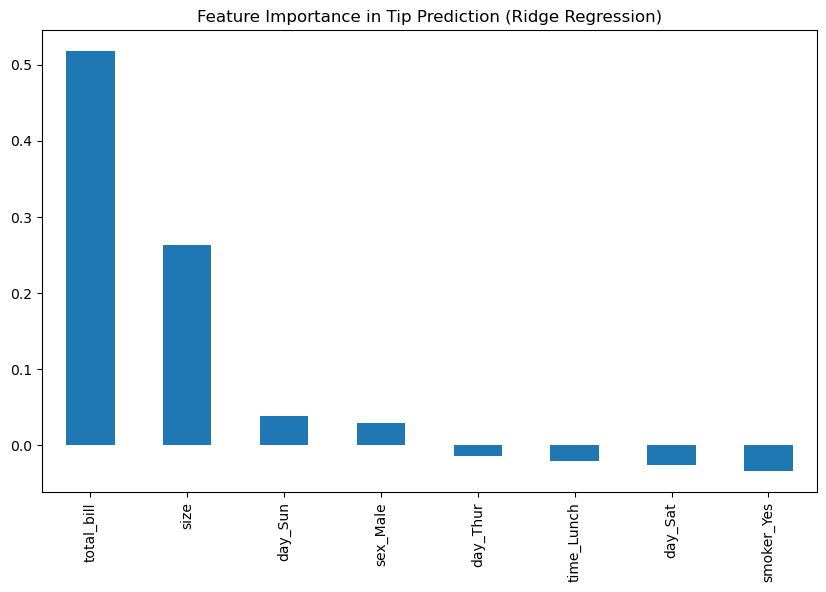

Most important features influencing tip amount (Ridge Regression):
total_bill    0.517577
size          0.262457
day_Sun       0.038269
sex_Male      0.029257
day_Thur     -0.014231
dtype: float64


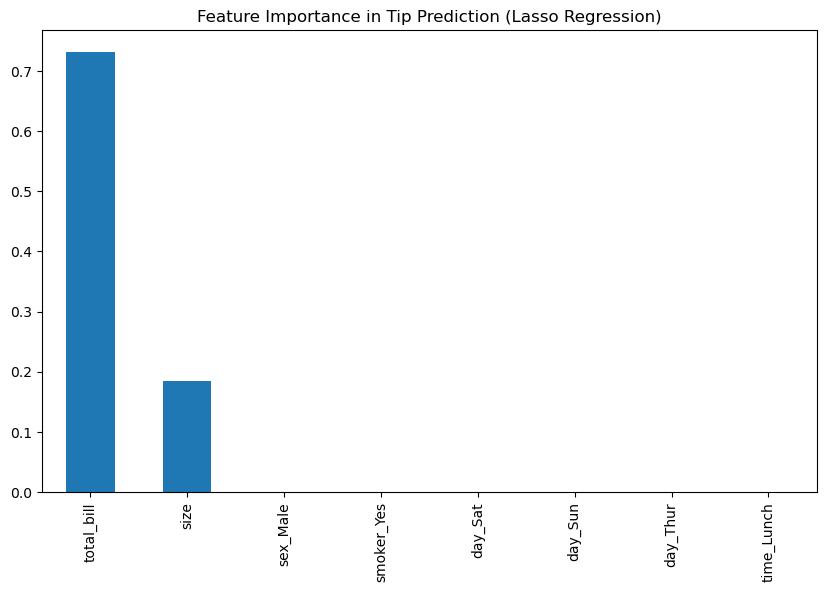

Most important features influencing tip amount (Lasso Regression):
total_bill    0.731173
size          0.184788
sex_Male      0.000000
smoker_Yes   -0.000000
day_Sat      -0.000000
dtype: float64


In [121]:
# Plotting Feature Importance for Linear Regression, Ridge, and Lasso Regression using coefficients
for name in [ "Ridge Regression", "Lasso Regression"]:
    model = final_models[name]
    feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
    coefficients = model.named_steps['model'].coef_
    
    feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f"Feature Importance in Tip Prediction ({name})")
    plt.show()
    
    print(f"Most important features influencing tip amount ({name}):")
    print(feature_importance.head(5))